<a href="https://colab.research.google.com/github/MohabASHRAF-byte/income-predication/blob/main/Copy_of_Mohab_of_income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pointbiserialr, spearmanr
import pickle
import joblib
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import time as timer

# Rest of your code...


# this line to fix output without need to run cells again
%matplotlib inline

In [295]:
data = pd.read_csv("train_data.csv")

data_test = pd.read_csv("test_data.csv")


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [297]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country Income   
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [298]:
for col in data.columns :
  print(col , data[col].unique(), '\n')
  

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt [ 77516  83311 215646 ...  34066  84661 257302] 

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing'

In [299]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country Income   
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [300]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [301]:
col_names = data_test.columns
num_data = data_test.shape[0]
for c in col_names:
    num_non = data_test[c].isin([' ?']).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
963
5.91%


occupation
966
5.93%


native-country
274
1.68%




In [302]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin([' ?']).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


native-country
583
1.79%




In [303]:
data = data[data != ' ?'].dropna()
data = data.reset_index(drop=True)

data_test = data_test[data_test != ' ?'].dropna()
data_test = data_test.reset_index(drop=True)

In [304]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin([' ?']).sum()
    print(num_non)
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  Income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [306]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education       15060 non-null  object
 4   education-num   15060 non-null  int64 
 5   marital-status  15060 non-null  object
 6   occupation      15060 non-null  object
 7   relationship    15060 non-null  object
 8   race            15060 non-null  object
 9   sex             15060 non-null  object
 10  capital-gain    15060 non-null  int64 
 11  capital-loss    15060 non-null  int64 
 12  hours-per-week  15060 non-null  int64 
 13  native-country  15060 non-null  object
 14  Income          15060 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.7+ MB


In [307]:
# remove all white spaces in values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data_test = data_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [308]:
for col in data.columns :
  print(col , data[col].unique(), '\n')

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86] 

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 

fnlwgt [ 77516  83311 215646 ...  84661 257302 201490] 

education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 

education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2] 

marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Fo

In [309]:
print(data.isnull().sum()) ;

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64


In [310]:
sum(data.duplicated())

23

In [311]:
data = data.drop_duplicates() ;

In [312]:
sum(data.duplicated())

0

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  Income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [314]:
data['marital-status'] = data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married')
data['marital-status'] = data['marital-status'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Not Married')
data['workclass'] = data['workclass'].replace(['State-gov', 'Local-gov', 'Federal-gov'], 'Gov')
data['workclass'] = data['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Non-Gov')
data['workclass'] = data['workclass'].replace(['Without-pay', 'Never-worked'], 'No salary')
data['relationship']=data['relationship'].replace(['Husband', 'Wife'], 'Spouse')

In [315]:
data_test['marital-status'] = data_test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married')
data_test['marital-status'] = data_test['marital-status'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Not Married')
data_test['workclass'] = data_test['workclass'].replace(['State-gov', 'Local-gov', 'Federal-gov'], 'Gov')
data_test['workclass'] = data_test['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Non-Gov')
data_test['workclass'] = data_test['workclass'].replace(['Without-pay', 'Never-worked'], 'No salary')
data_test['relationship']=data_test['relationship'].replace(['Husband', 'Wife'], 'Spouse')

In [316]:
le  = LabelEncoder()

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  Income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [318]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [319]:
for col in data_test.columns:
    if data_test[col].dtype == 'object':
        data_test[col] = le.fit_transform(data_test[col])

In [320]:
data['Income '].unique()

array([0, 1])

In [321]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15060 non-null  int64
 1   workclass       15060 non-null  int64
 2   fnlwgt          15060 non-null  int64
 3   education       15060 non-null  int64
 4   education-num   15060 non-null  int64
 5   marital-status  15060 non-null  int64
 6   occupation      15060 non-null  int64
 7   relationship    15060 non-null  int64
 8   race            15060 non-null  int64
 9   sex             15060 non-null  int64
 10  capital-gain    15060 non-null  int64
 11  capital-loss    15060 non-null  int64
 12  hours-per-week  15060 non-null  int64
 13  native-country  15060 non-null  int64
 14  Income          15060 non-null  int64
dtypes: int64(15)
memory usage: 1.7 MB


In [322]:
data.describe()

age     workclass        fnlwgt     education  education-num  \
count  30139.000000  30139.000000  3.013900e+04  30139.000000   30139.000000   
mean      38.441720      1.714921  1.897950e+05     10.333057      10.122532   
std       13.131426      0.698885  1.056586e+05      3.812057       2.548738   
min       17.000000      0.000000  1.376900e+04      0.000000       1.000000   
25%       28.000000      2.000000  1.176275e+05      9.000000       9.000000   
50%       37.000000      2.000000  1.784170e+05     11.000000      10.000000   
75%       47.000000      2.000000  2.376045e+05     12.000000      13.000000   
max       90.000000      2.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    30139.000000  30139.000000  30139.000000  30139.000000  30139.000000   
mean         0.520555      5.960317      2.131657      3.678523      0.675736   
std          0.499586      4.030067      1.386414      0.834786      0.468107   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      2.000000      0.000000      4.000000      0.000000   
50%          1.000000      6.000000      3.000000      4.000000      1.000000   
75%          1.000000      9.000000      3.000000      4.000000      1.000000   
max          1.000000     13.000000      4.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  \
count  30139.000000  30139.000000    30139.000000    30139.000000   
mean    1092.841202     88.439928       40.934703       36.384784   
std     7409.110596    404.445239       11.978753        6.102941   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       38.000000   
50%        0.000000      0.000000       40.000000       38.000000   
75%        0.000000      0.000000       45.000000       38.000000   
max    99999.000000   4356.000000       99.000000       40.000000   

            Income   
count  30139.000000  
mean       0.249046  
std        0.432468  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

<Axes: xlabel='age'>

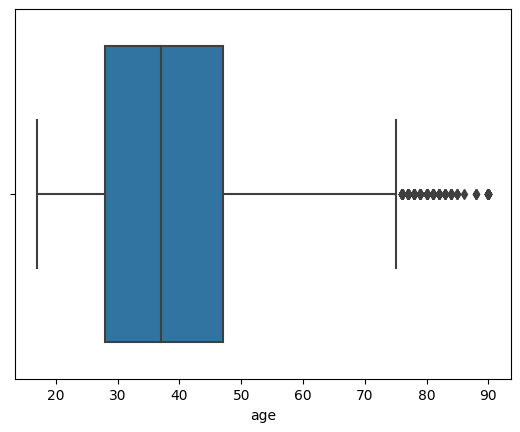

In [323]:
sns.boxplot(x=data['age'])

In [324]:
# for col in data.columns :
#   if col != 'Income ' :
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # calculate the upper and lower bounds for outliers
#     upper_bound = Q3 + 1.5 * IQR
#     lower_bound = Q1 - 1.5 * IQR

#     # Replace outliers with the maximum or minimum value of the IQR
#     data[col].loc[data[col] > upper_bound] = upper_bound
#     data[col].loc[data[col] < lower_bound] = lower_bound
#     sns.boxplot(x=data[col])

data.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          0   77516          9             13               1   
1   50          2   83311          9             13               0   
2   38          2  215646         11              9               1   
3   53          2  234721          1              7               0   
4   28          2  338409          9             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     4    1          2174             0   
1           3             3     4    1             0             0   
2           5             0     4    1             0             0   
3           5             3     2    1             0             0   
4           9             3     2    0             0             0   

   hours-per-week  native-country  Income   
0              40              38        0  
1              13              38        0  
2              40              38        0  
3              40              38        0  
4              40               4        0

In [325]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'native-country', 'Income ','sex']
for col in data.columns:
    if col in category_col:
      continue;
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( data[col] < lower) | (data[col] > upper) )
    index_label = data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    # data.drop(index_label, inplace=True)

Number of outliers in age: 168
Number of outliers in fnlwgt: 904
Number of outliers in education-num: 193
Number of outliers in capital-gain: 2538
Number of outliers in capital-loss: 1427
Number of outliers in hours-per-week: 7947


In [326]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'native-country', 'Income ','sex']
for col in data_test.columns:
    if col in category_col:
      continue;
    q25, q75 = np.percentile(data_test[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( data_test[col] < lower) | (data_test[col] > upper) )
    index_label = data_test[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    # data.drop(index_label, inplace=True)

Number of outliers in age: 100
Number of outliers in fnlwgt: 439
Number of outliers in education-num: 98
Number of outliers in capital-gain: 1252
Number of outliers in capital-loss: 713
Number of outliers in hours-per-week: 3946


<Axes: xlabel='age'>

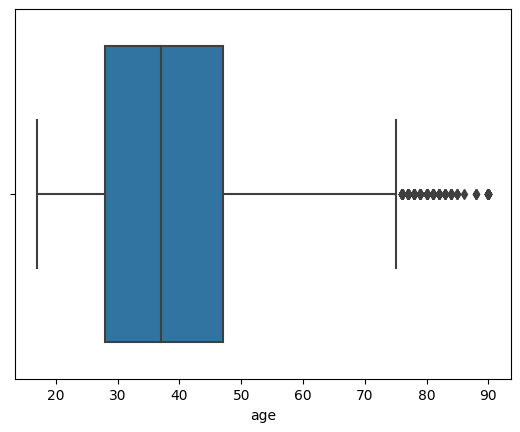

In [327]:
sns.boxplot(x=data['age'])

<Axes: xlabel='hours-per-week'>

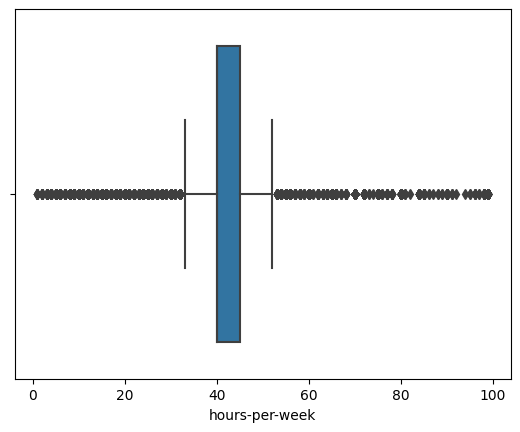

In [328]:
sns.boxplot(x=data['hours-per-week'])

In [329]:
data.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          0   77516          9             13               1   
1   50          2   83311          9             13               0   
2   38          2  215646         11              9               1   
3   53          2  234721          1              7               0   
4   28          2  338409          9             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     4    1          2174             0   
1           3             3     4    1             0             0   
2           5             0     4    1             0             0   
3           5             3     2    1             0             0   
4           9             3     2    0             0             0   

   hours-per-week  native-country  Income   
0              40              38        0  
1              13              38        0  
2              40              38        0  
3              40              38        0  
4              40               4        0

In [330]:
data['Income '].unique()


array([0, 1])

In [331]:
param=[]
correlation=[]
abs_corr=[]

for c in data.columns:
    if c != 'Income ' :
        if len(data[c].unique()) <= 2:
            corr = spearmanr(data['Income '],data[c])[0]
        else:
            corr = pointbiserialr(data['Income '],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)
param_df=param_df.set_index('parameter')
param_df

correlation  abs_corr
parameter                            
marital-status    -0.436044  0.436044
education-num      0.335413  0.335413
age                0.242017  0.242017
hours-per-week     0.229435  0.229435
relationship       0.228431  0.228431
capital-gain       0.221204  0.221204
sex                0.216668  0.216668
capital-loss       0.150026  0.150026
education          0.079039  0.079039
race               0.071689  0.071689
workclass         -0.054473  0.054473
occupation         0.051476  0.051476
native-country     0.023041  0.023041
fnlwgt            -0.008992  0.008992

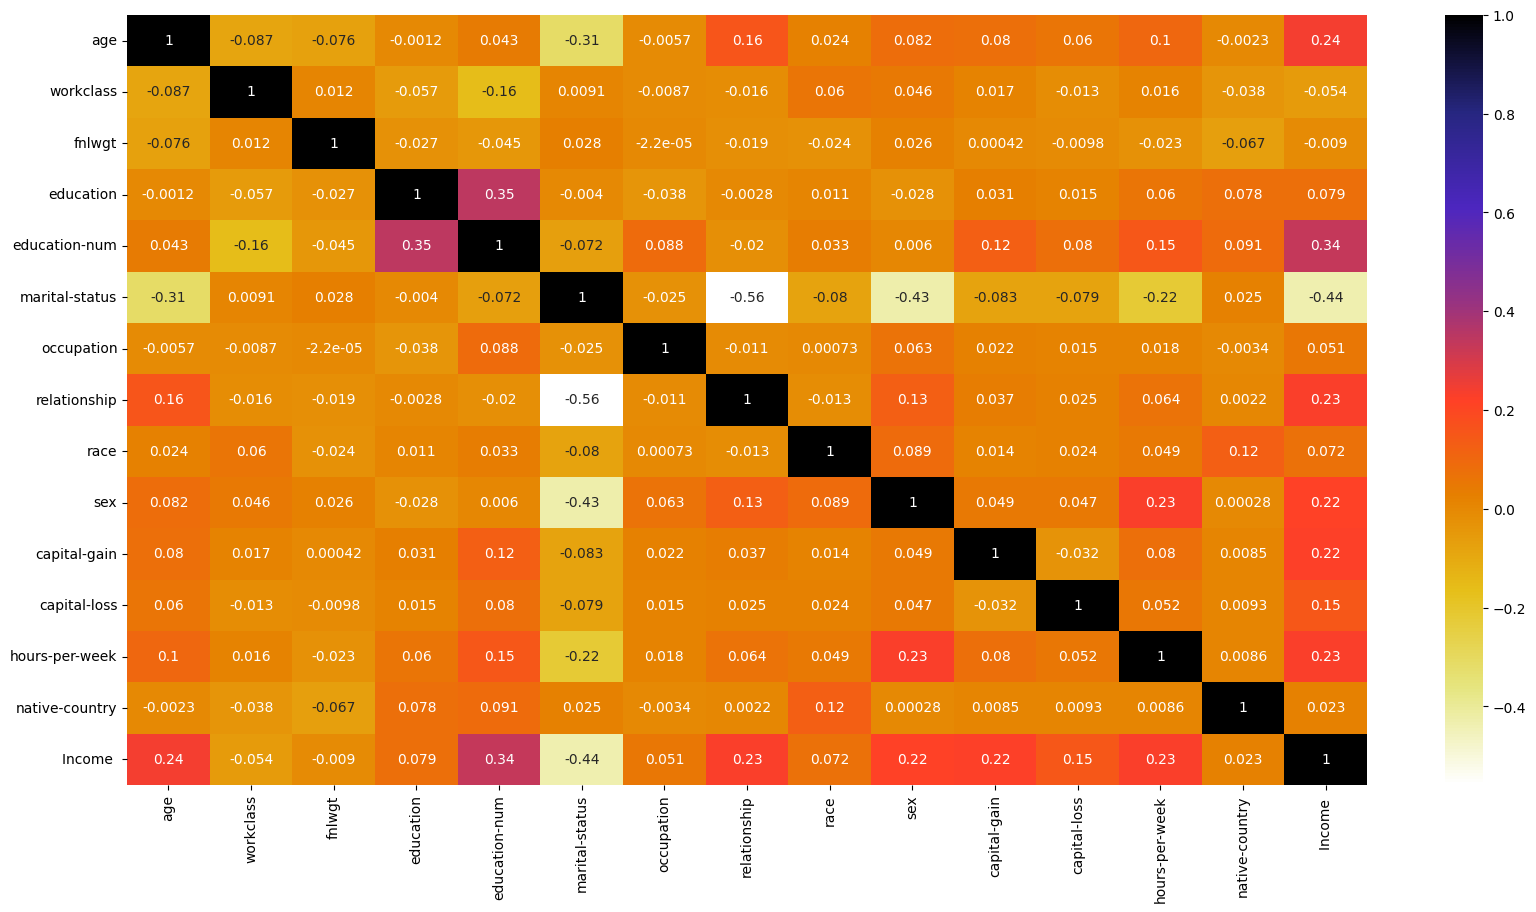

In [332]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  Income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [334]:
Y_Train = data['Income ']

In [335]:
dropedItems =["education","fnlwgt","workclass","native-country","race","occupation","capital-loss"]
# for item in dropedItems:
#     data.drop(item, axis=1, inplace=True)

data.head()

In [336]:
data.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          0   77516          9             13               1   
1   50          2   83311          9             13               0   
2   38          2  215646         11              9               1   
3   53          2  234721          1              7               0   
4   28          2  338409          9             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     4    1          2174             0   
1           3             3     4    1             0             0   
2           5             0     4    1             0             0   
3           5             3     2    1             0             0   
4           9             3     2    0             0             0   

   hours-per-week  native-country  Income   
0              40              38        0  
1              13              38        0  
2              40              38        0  
3              40              38        0  
4              40               4        0

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  Income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [338]:

for i in data.columns:
  data_test = data_test.rename(columns={i: i.strip()})
  data = data.rename(columns={i: i.strip()})

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  Income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [340]:
# scaler = MinMaxScaler()
# # normalization
# NormalizedData =["age","capital-gain","hours-per-week"]
# for i in NormalizedData:
#     data[i] = scaler.fit_transform(data[[i]])
#     data_test[i] = scaler.fit_transform(data_test[[i]])


In [341]:
data.head(10)

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          0   77516          9             13               1   
1   50          2   83311          9             13               0   
2   38          2  215646         11              9               1   
3   53          2  234721          1              7               0   
4   28          2  338409          9             13               0   
5   37          2  284582         12             14               0   
6   49          2  160187          6              5               0   
7   52          2  209642         11              9               0   
8   31          2   45781         12             14               1   
9   42          2  159449          9             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     4    1          2174             0   
1           3             3     4    1             0             0   
2           5             0     4    1             0             0   
3           5             3     2    1             0             0   
4           9             3     2    0             0             0   
5           3             3     4    0             0             0   
6           7             0     2    0             0             0   
7           3             3     4    1             0             0   
8           9             0     4    0         14084             0   
9           3             3     4    1          5178             0   

   hours-per-week  native-country  Income  
0              40              38       0  
1              13              38       0  
2              40              38       0  
3              40              38       0  
4              40               4       0  
5              40              38       0  
6              16              22       0  
7              45              38       1  
8              50              38       1  
9              40              38       1

In [342]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15060 non-null  int64
 1   workclass       15060 non-null  int64
 2   fnlwgt          15060 non-null  int64
 3   education       15060 non-null  int64
 4   education-num   15060 non-null  int64
 5   marital-status  15060 non-null  int64
 6   occupation      15060 non-null  int64
 7   relationship    15060 non-null  int64
 8   race            15060 non-null  int64
 9   sex             15060 non-null  int64
 10  capital-gain    15060 non-null  int64
 11  capital-loss    15060 non-null  int64
 12  hours-per-week  15060 non-null  int64
 13  native-country  15060 non-null  int64
 14  Income          15060 non-null  int64
dtypes: int64(15)
memory usage: 1.7 MB


In [343]:
param=[]
correlation=[]
abs_corr=[]

for c in data.columns:
    if c != 'Income' :
        if len(data[c].unique()) <= 2:
            corr = spearmanr(data['Income'],data[c])[0]
        else:
            corr = pointbiserialr(data['Income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)
param_df=param_df.set_index('parameter')
param_df

correlation  abs_corr
parameter                            
marital-status    -0.436044  0.436044
education-num      0.335413  0.335413
age                0.242017  0.242017
hours-per-week     0.229435  0.229435
relationship       0.228431  0.228431
capital-gain       0.221204  0.221204
sex                0.216668  0.216668
capital-loss       0.150026  0.150026
education          0.079039  0.079039
race               0.071689  0.071689
workclass         -0.054473  0.054473
occupation         0.051476  0.051476
native-country     0.023041  0.023041
fnlwgt            -0.008992  0.008992

# **Data Sampling**

In [359]:
features =['marital-status','education-num','age','hours-per-week','relationship','capital-gain']
# ,'relationship','capital-gain'
X_train=data[features]
Y_train=data['Income']
X_test=data_test[features]
Y_test=data_test['Income']



## **Data Sampling**

In [360]:
# # overfiting
# ros = RandomOverSampler(random_state=0)

# X_train, Y_train = ros.fit_resample(X_train, Y_train)

# print("Number of samples in each class:", np.bincount(Y_train))

In [361]:
# # smote
# X_train.info()
# smote=SMOTE()
# X_train,Y_train = smote.fit_resample(X_train,Y_train)
# X_test,Y_test = smote.fit_resample(X_test,Y_test)

# **Test Algorithms**

### **logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


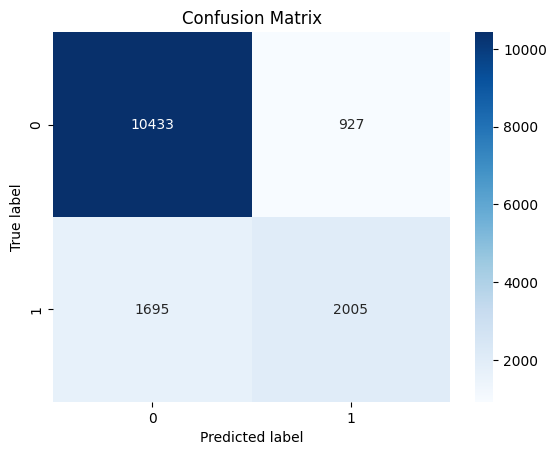

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11360
           1       0.68      0.54      0.60      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.73      0.75     15060
weighted avg       0.82      0.83      0.82     15060



In [362]:

classifier = LogisticRegression(random_state =150)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
x=classifier.score(X_train,Y_train)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix')

plt.show()
cr=classification_report(Y_test, y_pred)
print(cr)

### **XGB Boost**

Accuracy: 0.850464807436919



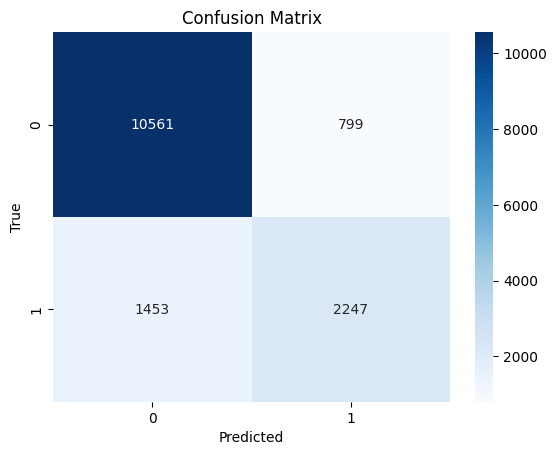

In [363]:
model = xgb.XGBClassifier(random_state=544)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == Y_test) / len(Y_test)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Decision Tree Classifier**

Accuracy: 0.8189907038512616



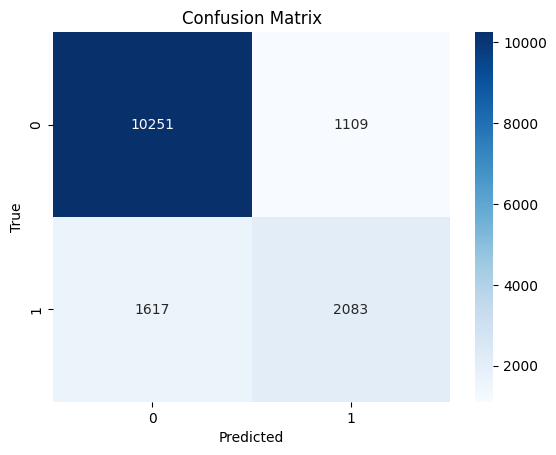

In [364]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy) 
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **SVM**

In [ ]:
clf = svm.SVC(kernel='poly', degree=1)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()